<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/HEALTHCARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Patient_Health_Records.csv')
df.head()


Saving Patient_Health_Records.csv to Patient_Health_Records.csv


,Patient ID,Age,Gender,Location,Occupation,Chronic Disease,Family History,Blood Pressure,Blood Sugar,BMI,...,Smoking,Alcohol Consumption,Exercise Habits,Diet,Stress Level,Doctor Visits,Treatment Plan,Follow-Ups,Recovery Time (Days),Quality of Life Improvement
0,P001,78,Female,Suburban,Farmer,Hypertension,Hypertension,139,176,33.6,...,Yes,Yes,No,Balanced,Low,4,Therapy,3,66,Deteriorated
1,P002,45,Female,Suburban,Office Worker,NaN,NaN,157,197,19.6,...,Yes,Yes,No,Balanced,Low,3,Medication,1,72,Improved
2,P003,62,Female,Rural,Unemployed,Heart Disease,Hypertension,110,182,28.4,...,Yes,No,Yes,Balanced,Low,10,Combined,1,23,No Change
3,P004,25,Female,Urban,Engineer,Diabetes,Diabetes,112,106,20.2,...,No,No,Yes,Unbalanced,Low,5,Therapy,5,25,Improved
4,P005,67,Female,Urban,Farmer,Diabetes,Asthma,106,141,20.0,...,No,No,Yes,Unbalanced,Low,6,Lifestyle Changes,3,9,Improved


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Drop non-numeric or unnecessary columns like 'Patient ID', 'Location', 'Occupation', etc.
df = df.drop(columns=['Patient ID', 'Location', 'Occupation'])

# Encoding categorical variables (Gender, Chronic Disease, Treatment Plan, Smoking, Alcohol Consumption, Exercise Habits, Diet)
categorical_columns = ['Gender', 'Chronic Disease', 'Treatment Plan', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet']

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Now selecting features (X) and target (y)
X = df[['Age', 'Gender', 'Blood Pressure', 'Blood Sugar', 'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet', 'Chronic Disease', 'Treatment Plan']]  # Features
y = df["Recovery Time (Days)"]  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 661.99519


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Drop non-numeric or unnecessary columns like 'Patient ID', 'Location', 'Occupation', etc.
df = df.drop(columns=['Patient ID', 'Location', 'Occupation'])

# Ensure numerical columns are in the correct numeric format
numerical_columns = ['Age', 'Blood Pressure', 'Blood Sugar', 'BMI', 'Cholesterol']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Encoding categorical variables (Gender, Chronic Disease, Treatment Plan, Smoking, Alcohol Consumption, Exercise Habits, Diet)
categorical_columns = ['Gender', 'Chronic Disease', 'Treatment Plan', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet']

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Handle missing values by replacing with the median of each column
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Now selecting features (X) and target (y)
X = df[['Age', 'Gender', 'Blood Pressure', 'Blood Sugar', 'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet', 'Chronic Disease', 'Treatment Plan']]  # Features
y = df["Recovery Time (Days)"]  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 661.99519


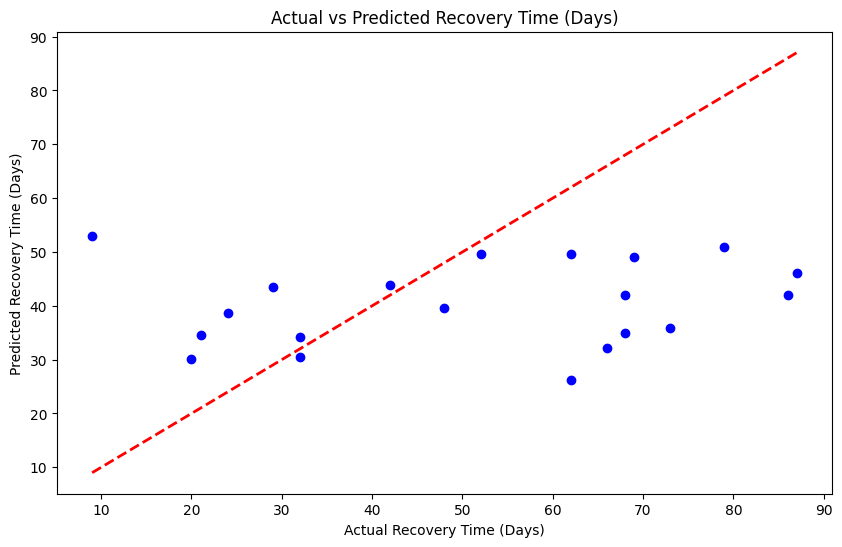

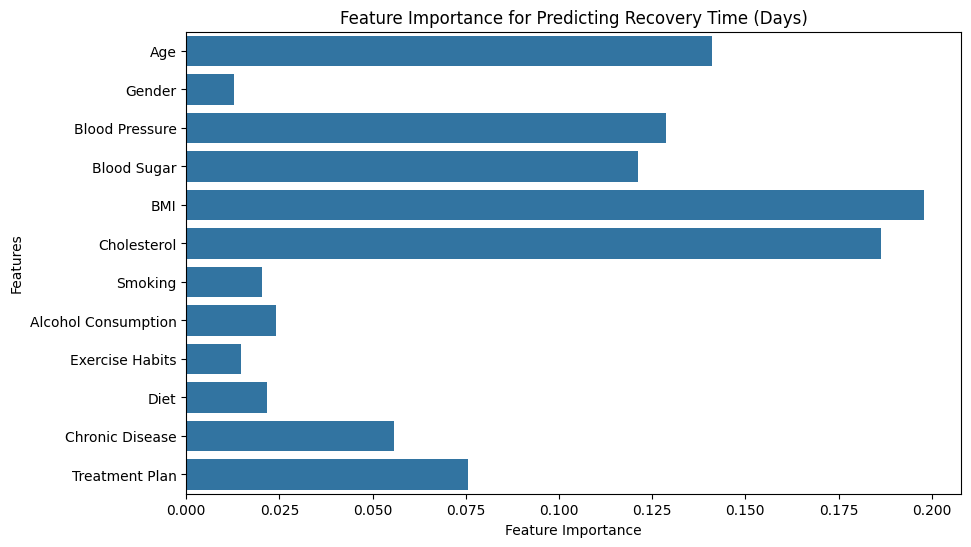

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Actual vs Predicted Recovery Time
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # line of perfect prediction
plt.title("Actual vs Predicted Recovery Time (Days)")
plt.xlabel("Actual Recovery Time (Days)")
plt.ylabel("Predicted Recovery Time (Days)")
plt.show()

# Visualize Feature Importance from the trained RandomForest model
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance for Predicting Recovery Time (Days)")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


#Stress Level Prediction
Prediction Goal: Predict the stress level of a patient based on features like age, chronic diseases, blood pressure, blood sugar, and treatment plans.

Target Column: Stress Level

Why Predict: Stress levels can significantly impact a patient's recovery. By predicting stress, you can provide interventions to improve mental health outcomes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features and target
X = df.drop(columns=["Stress Level", "Recovery Time (Days)", "Quality of Life Improvement"])  # Features
y = df["Stress Level"]  # Target: Stress Level

# Encode categorical features if necessary (e.g., gender, chronic diseases, treatment plans)
# This might be needed depending on your dataset
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding for categorical features

# Handle missing values (e.g., fill with median or mean)
X.fillna(X.median(), inplace=True)  # Impute numerical missing values with median

# Encode the target variable (Stress Level) if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)  # Encoding the target if it's categorical (e.g., 'Low', 'Medium', 'High')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_stress = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_stress.fit(X_train, y_train)

# Make predictions
y_pred_stress = model_stress.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stress)
print("Accuracy for Stress Level Prediction: ", accuracy)

# Classification report (for more detailed evaluation)
print(classification_report(y_test, y_pred_stress, target_names=le.classes_))



Accuracy for Stress Level Prediction:  0.55
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       0.67      0.55      0.60        11
    Moderate       0.20      0.20      0.20         5

    accuracy                           0.55        20
   macro avg       0.51      0.58      0.53        20
weighted avg       0.55      0.55      0.54        20



Accuracy for Stress Level Prediction:  0.55
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       0.67      0.55      0.60        11
    Moderate       0.20      0.20      0.20         5

    accuracy                           0.55        20
   macro avg       0.51      0.58      0.53        20
weighted avg       0.55      0.55      0.54        20



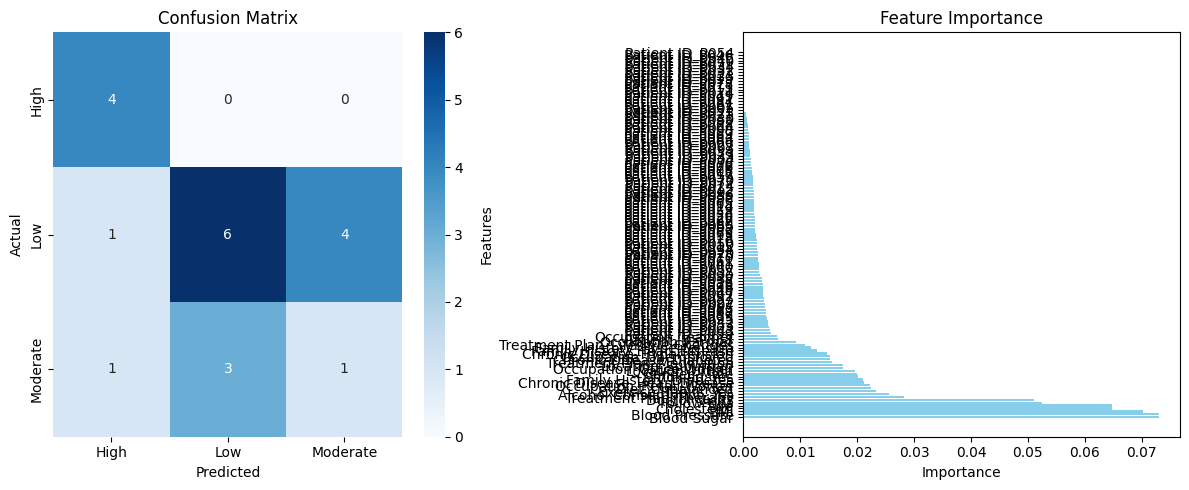

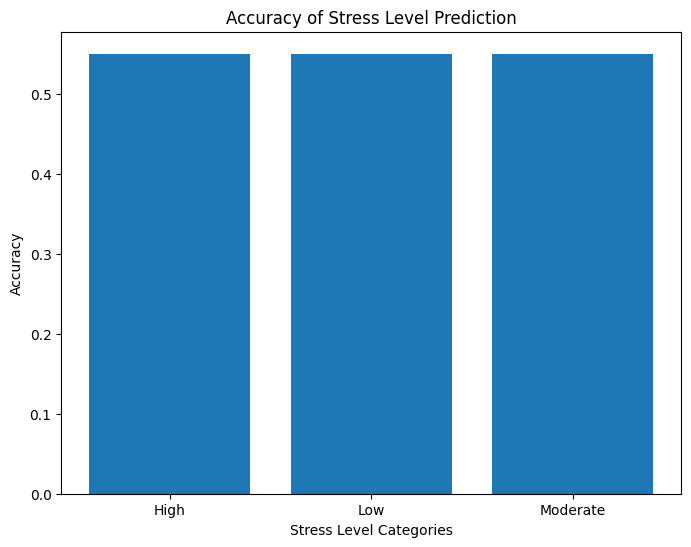

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features and target
X = df.drop(columns=["Stress Level", "Recovery Time (Days)", "Quality of Life Improvement"])  # Features
y = df["Stress Level"]  # Target: Stress Level

# Encode categorical features if necessary (e.g., gender, chronic diseases, treatment plans)
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding for categorical features

# Handle missing values (e.g., fill with median or mean)
X.fillna(X.median(), inplace=True)  # Impute numerical missing values with median

# Encode the target variable (Stress Level) if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)  # Encoding the target if it's categorical (e.g., 'Low', 'Medium', 'High')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_stress = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_stress.fit(X_train, y_train)

# Make predictions
y_pred_stress = model_stress.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stress)
print("Accuracy for Stress Level Prediction: ", accuracy)

# Classification report (for more detailed evaluation)
print(classification_report(y_test, y_pred_stress, target_names=le.classes_))

# Visualize the results
plt.figure(figsize=(12, 5))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_stress)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Subplot 2: Feature Importance
plt.subplot(1, 2, 2)
feature_importances = model_stress.feature_importances_
features = X.columns
indices = feature_importances.argsort()[::-1]
plt.barh(features[indices], feature_importances[indices], color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

# Show the plots
plt.tight_layout()
plt.show()

# Accuracy bar chart (for stress level categories)
plt.figure(figsize=(8, 6))
plt.bar(le.classes_, [accuracy])
plt.title("Accuracy of Stress Level Prediction")
plt.xlabel("Stress Level Categories")
plt.ylabel("Accuracy")
plt.show()


#Quality of Life Improvement Prediction
Prediction Goal: Predict how much a patient’s quality of life improves after treatment based on the same set of features or additional ones like treatment type or follow-up visits.

Target Column: Quality of Life Improvement

Why Predict: This can provide insights into how effective treatments are in improving patients' overall well-being.

Accuracy for Quality of Life Improvement: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.71      0.71      0.71         7
           2       0.36      1.00      0.53         4

    accuracy                           0.45        20
   macro avg       0.36      0.57      0.42        20
weighted avg       0.32      0.45      0.36        20



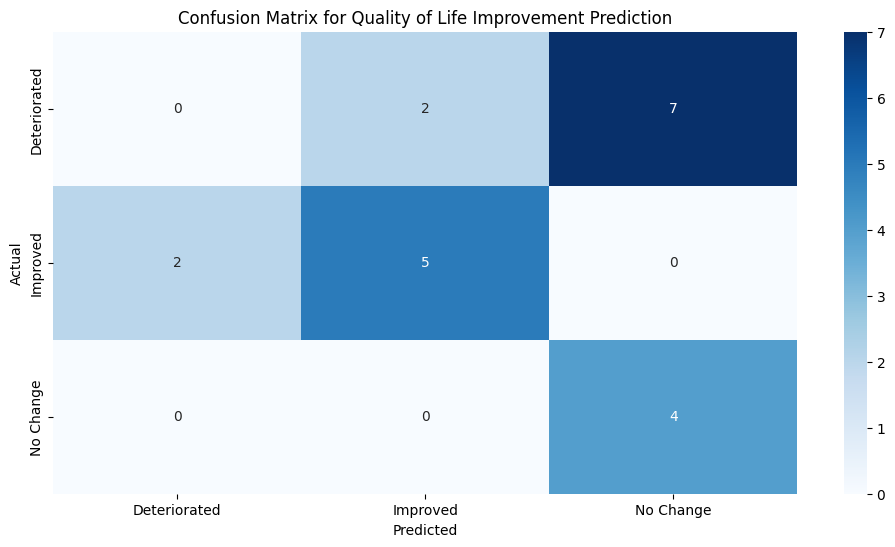

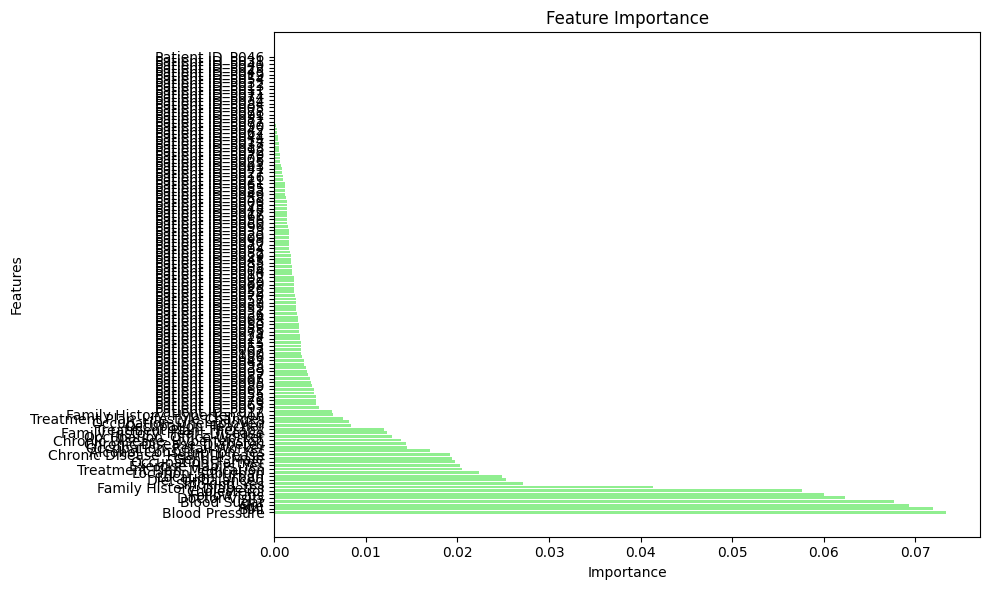

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features and target
X = df.drop(columns=["Quality of Life Improvement", "Stress Level", "Recovery Time (Days)"])  # Features
y = df["Quality of Life Improvement"]  # Target: Quality of Life Improvement

# Encode categorical features (for example, gender, chronic diseases, treatment plans)
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding for categorical features

# Handle missing values (impute with median)
X.fillna(X.median(), inplace=True)
y.fillna(y.mode()[0], inplace=True)  # Fill missing target values with the most frequent label

# Encode the target labels (Quality of Life Improvement)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convert 'Improved', 'Deteriorated', 'No Change' to numeric labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_quality_of_life = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_quality_of_life.fit(X_train, y_train)

# Make predictions
y_pred_quality_of_life = model_quality_of_life.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_quality_of_life)
print(f"Accuracy for Quality of Life Improvement: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_quality_of_life))

# Visualize the results

plt.figure(figsize=(12, 6))

# Plot: Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_quality_of_life)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Quality of Life Improvement Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = model_quality_of_life.feature_importances_
features = X.columns
indices = feature_importances.argsort()[::-1]
plt.barh(features[indices], feature_importances[indices], color="lightgreen")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

# Show the plots
plt.tight_layout()
plt.show()


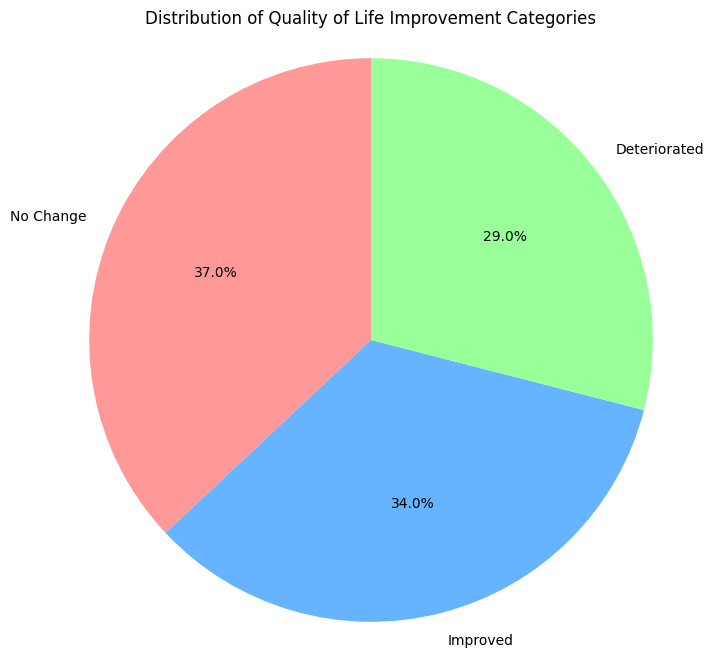

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Extract the target column (Quality of Life Improvement)
quality_of_life = df["Quality of Life Improvement"]

# Value counts for the different categories (Improved, Deteriorated, No Change)
category_counts = quality_of_life.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Quality of Life Improvement Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


#To predict the Treatment Plan (e.g., Therapy, Medication, Combined, Lifestyle Changes) based on a patient’s medical history and current health status, we can approach this as a classification problem. The goal is to predict a categorical target: Treatment Plan.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features (medical history and current health status)
X = df.drop(columns=["Treatment Plan", "Patient ID"])  # Dropping the target column and any non-useful columns
y = df["Treatment Plan"]  # Target column

# Handling categorical features by encoding
X = pd.get_dummies(X)  # One-hot encoding categorical variables
y = LabelEncoder().fit_transform(y)  # Encoding the target column (Treatment Plan)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 35.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.29      0.50      0.36         4
           3       0.45      0.71      0.56         7

    accuracy                           0.35        20
   macro avg       0.19      0.30      0.23        20
weighted avg       0.22      0.35      0.27        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


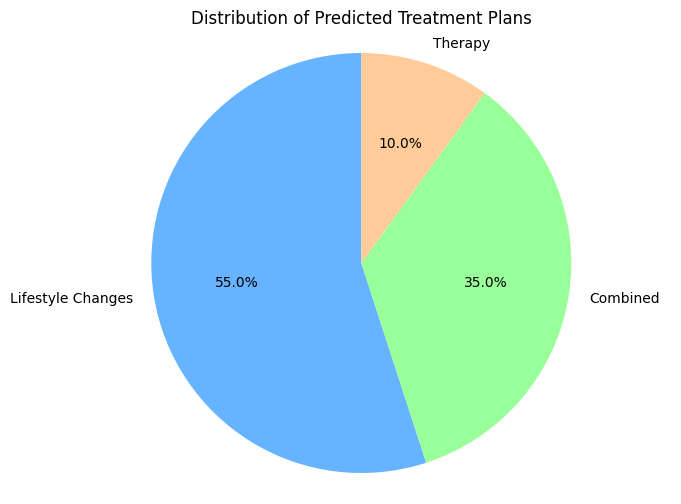

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_pred contains the predicted treatment plans
# Count the occurrences of each treatment plan
treatment_plan_counts = pd.Series(y_pred).value_counts()

# Generate labels dynamically based on the unique values in y_pred
treatment_plan_labels = ['Therapy', 'Medication', 'Combined', 'Lifestyle Changes']
# Map the labels to the values in y_pred
label_map = {0: 'Therapy', 1: 'Medication', 2: 'Combined', 3: 'Lifestyle Changes'}
# If the model outputs integer labels, we need to map them to the string labels
predicted_labels = treatment_plan_counts.index.map(label_map)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(treatment_plan_counts, labels=predicted_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Distribution of Predicted Treatment Plans')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


In [ ]:
# New patient's data (same features as in the original dataset)
new_patient_data = {
    'Age': [45],
    'Gender': ['Male'],
    'Chronic Disease': ['Yes'],
    'Blood Pressure': [120],
    'Blood Sugar': [150],
    'BMI': [28.5],
    'Smoking': ['No'],
    'Alcohol Consumption': ['Yes'],
    'Exercise Habits': ['Regular'],
    'Diet': ['Balanced'],
    'Doctor Visits': ['Frequent'],
    'Follow-Ups': ['Yes']
}

# Convert new patient data into DataFrame
new_patient_df = pd.DataFrame(new_patient_data)

# Perform the same preprocessing on new data (encoding categorical features)
new_patient_df = pd.get_dummies(new_patient_df)  # One-hot encode
new_patient_df = new_patient_df.reindex(columns=X.columns, fill_value=0)  # Align with training data columns

# Predict the treatment plan
new_patient_prediction = model.predict(new_patient_df)

# Map the predicted label back to the treatment plan
label_map = {0: 'Therapy', 1: 'Medication', 2: 'Combined', 3: 'Lifestyle Changes'}
predicted_treatment_plan = label_map[new_patient_prediction[0]]

print(f"The predicted treatment plan for the new patient is: {predicted_treatment_plan}")


The predicted treatment plan for the new patient is: Lifestyle Changes


#Step-by-Step Guide to Building a Neural Network for Treatment Plan Prediction

In [ ]:
pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features and target column
X = df.drop(columns=["Treatment Plan", "Patient ID"])  # Dropping the target column and any non-useful columns
y = df["Treatment Plan"]  # Target column

# Handle categorical features (using one-hot encoding)
X = pd.get_dummies(X)  # One-hot encoding categorical variables

# Encode the target column (Treatment Plan) using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Building the Neural Network Model
We'll use a Sequential model in Keras with fully connected layers. The number of hidden units and layers will be tuned to ensure that the network can learn complex patterns.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the neural network model
model = Sequential()

# Input layer (size of input features)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Output layer (number of unique treatment plans)
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3203 - loss: 1.4358 - val_accuracy: 0.1000 - val_loss: 1.5843
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2969 - loss: 1.4421 - val_accuracy: 0.1000 - val_loss: 1.5532
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3906 - loss: 1.3230 - val_accuracy: 0.1000 - val_loss: 1.5273
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3164 - loss: 1.3218 - val_accuracy: 0.1000 - val_loss: 1.5094
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4055 - loss: 1.2508 - val_accuracy: 0.1500 - val_loss: 1.4964
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4594 - loss: 1.2301 - val_accuracy: 0.1500 - val_loss: 1.4865
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5531 - loss: 1.1494 - val_accuracy: 0.1500 - val_loss: 1.4784
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5562 - loss: 1.1670 - val_accuracy: 0.1500 - val_loss: 1.4699

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1500 - loss: 1.6591
Test Accuracy: 15.00%


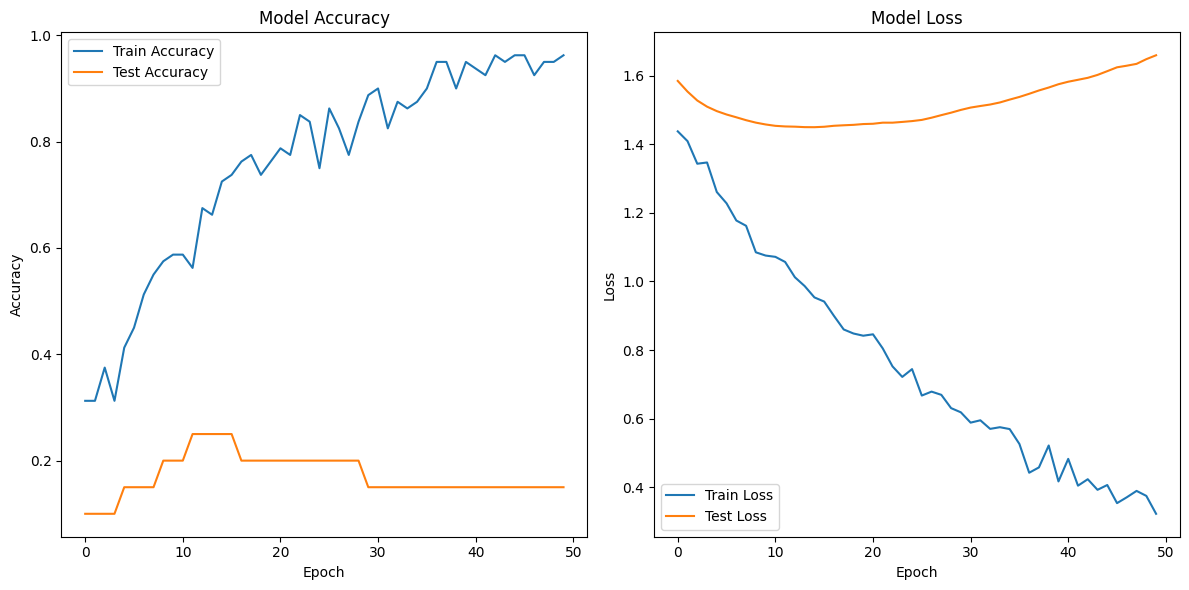

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Predicting the treatment plans
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = label_encoder.inverse_transform(y_pred.argmax(axis=1))

# Convert the true labels to treatment plans
y_true = label_encoder.inverse_transform(y_test)

# Display some predicted vs true treatment plans
for i in range(10):
    print(f"Predicted: {y_pred_classes[i]}, Actual: {y_true[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted: Therapy, Actual: Lifestyle Changes
Predicted: Therapy, Actual: Medication
Predicted: Therapy, Actual: Medication
Predicted: Therapy, Actual: Combined
Predicted: Medication, Actual: Combined
Predicted: Therapy, Actual: Lifestyle Changes
Predicted: Medication, Actual: Medication
Predicted: Combined, Actual: Medication
Predicted: Therapy, Actual: Therapy
Predicted: Combined, Actual: Therapy


In [ ]:
# Save the trained model
model.save("treatment_plan_predictor.h5")


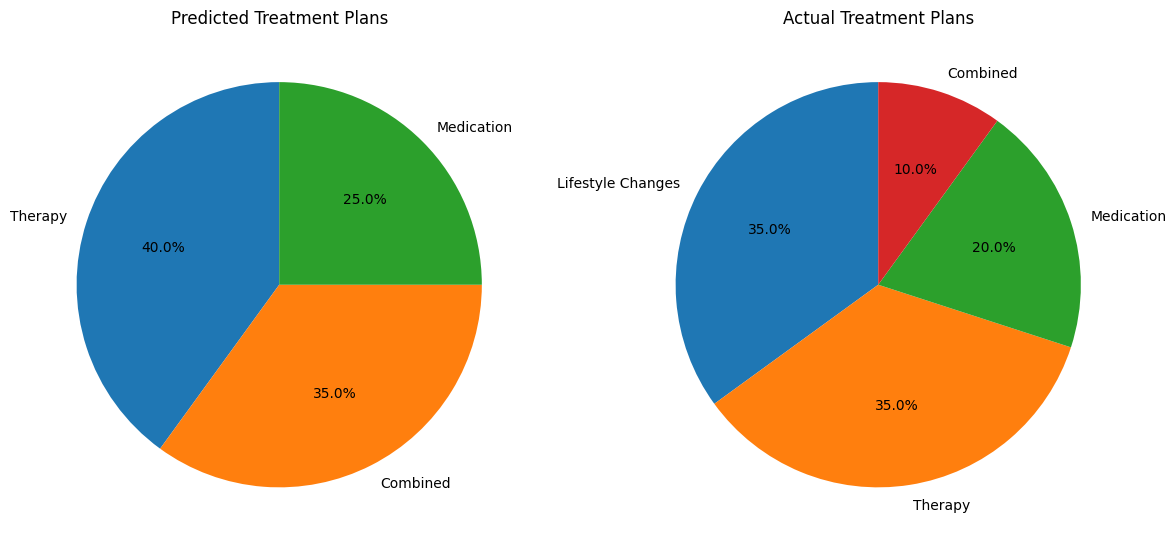

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of predicted vs actual treatment plans
predicted_counts = pd.Series(y_pred_classes).value_counts()
actual_counts = pd.Series(y_true).value_counts()

# Create the figure for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting predicted treatment plans
ax[0].pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Predicted Treatment Plans')

# Plotting actual treatment plans
ax[1].pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Actual Treatment Plans')

plt.tight_layout()
plt.show()


#Stress Level
Prediction Goal: Predict a patient’s stress level (Low, Moderate, High) based on medical conditions, lifestyle habits, and occupation.
Target Column: Stress Level

Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.71      0.45      0.56        11
           2       0.40      0.40      0.40         5

    accuracy                           0.50        20
   macro avg       0.50      0.53      0.49        20
weighted avg       0.57      0.50      0.51        20



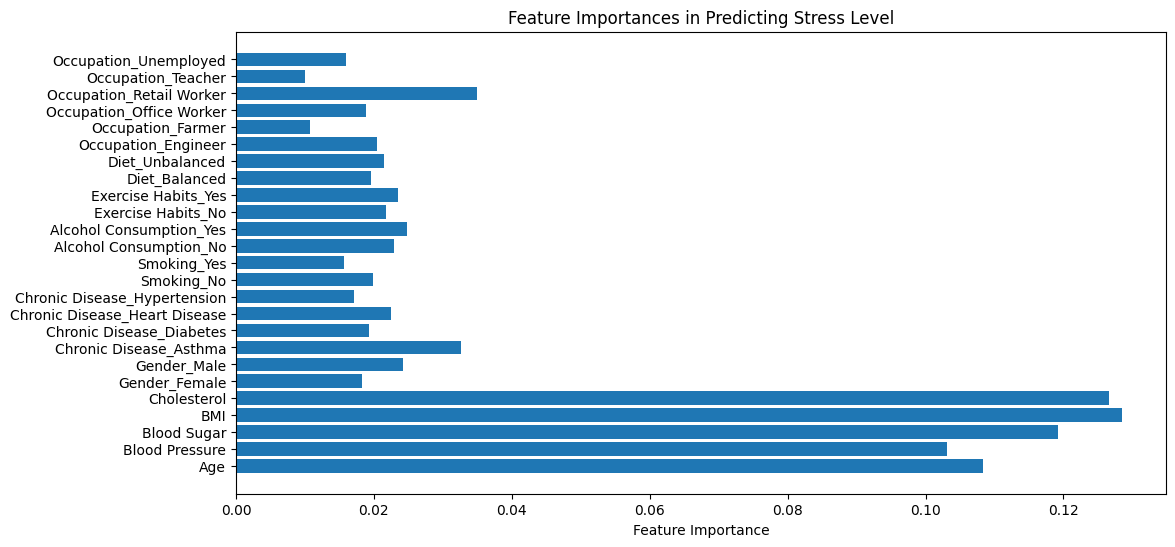

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

y = df["Stress Level"]  # Target column

# Handling categorical features by encoding
X = pd.get_dummies(X)  # One-hot encoding categorical variables (e.g., Gender, Occupation, etc.)
y = LabelEncoder().fit_transform(y)  # Encoding the target column (Stress Level)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the feature importances
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Predicting Stress Level")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # For numeric columns
# Alternatively, you could drop rows with missing values (df.dropna(inplace=True))

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

y = df["Stress Level"]  # Target column

# Handling categorical features by encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables (e.g., Gender, Occupation, etc.)
y = LabelEncoder().fit_transform(y)  # Encoding the target column (Stress Level)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Predicting Stress Level")
plt.show()


Patient ID                      0
Age                             0
Gender                          0
Location                        0
Occupation                      0
Chronic Disease                21
Family History                 41
Blood Pressure                  0
Blood Sugar                     0
BMI                             0
Cholesterol                     0
Smoking                         0
Alcohol Consumption             0
Exercise Habits                 0
Diet                            0
Stress Level                    0
Doctor Visits                   0
Treatment Plan                  0
Follow-Ups                      0
Recovery Time (Days)            0
Quality of Life Improvement     0
dtype: int64


TypeError: can only concatenate str (not "int") to str

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Check for missing values
print(df.isnull().sum())

# Handle missing values (fill with the mode for categorical features, mean for numeric)
df['Chronic Disease'] = df['Chronic Disease'].fillna(df['Chronic Disease'].mode()[0])  # Fill with mode
df['Family History'] = df['Family History'].fillna(df['Family History'].mode()[0])  # Fill with mode

# For other numeric columns, you could fill with mean or median (if required)
# df['Numeric_Column'] = df['Numeric_Column'].fillna(df['Numeric_Column'].mean())

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

y = df["Stress Level"]  # Target column

# Handling categorical features by encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables (e.g., Gender, Occupation, etc.)
y = LabelEncoder().fit_transform(y)  # Encoding the target column (Stress Level)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Patient ID                      0
Age                             0
Gender                          0
Location                        0
Occupation                      0
Chronic Disease                21
Family History                 41
Blood Pressure                  0
Blood Sugar                     0
BMI                             0
Cholesterol                     0
Smoking                         0
Alcohol Consumption             0
Exercise Habits                 0
Diet                            0
Stress Level                    0
Doctor Visits                   0
Treatment Plan                  0
Follow-Ups                      0
Recovery Time (Days)            0
Quality of Life Improvement     0
dtype: int64
Accuracy: 40.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.57      0.36      0.44        11
           2       0.33      0.20      0.25         5

    accuracy   

Accuracy: 40.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.57      0.36      0.44        11
           2       0.33      0.20      0.25         5

    accuracy                           0.40        20
   macro avg       0.40      0.44      0.37        20
weighted avg       0.46      0.40      0.39        20



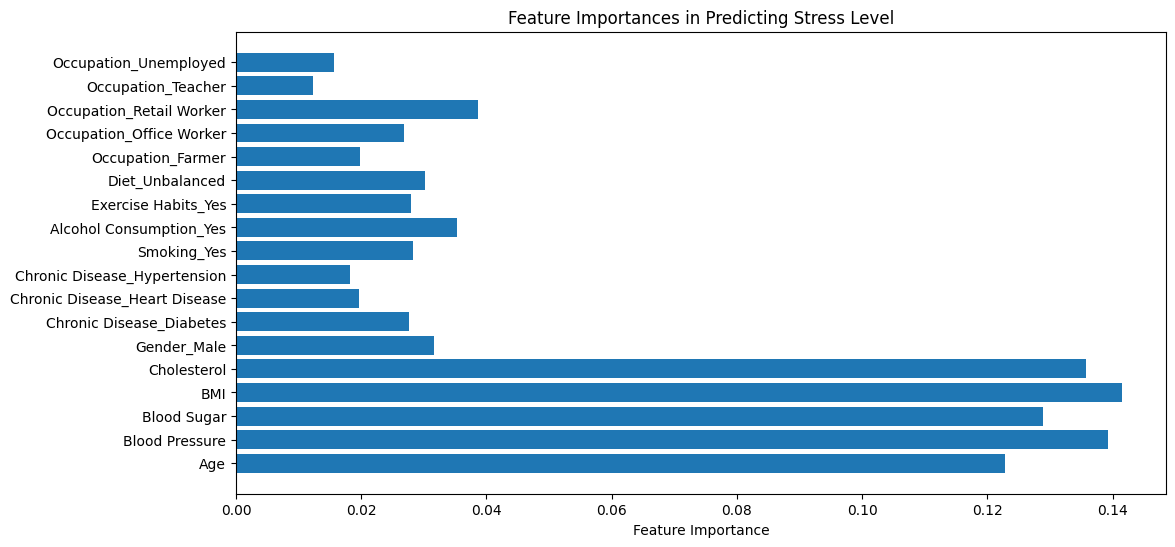

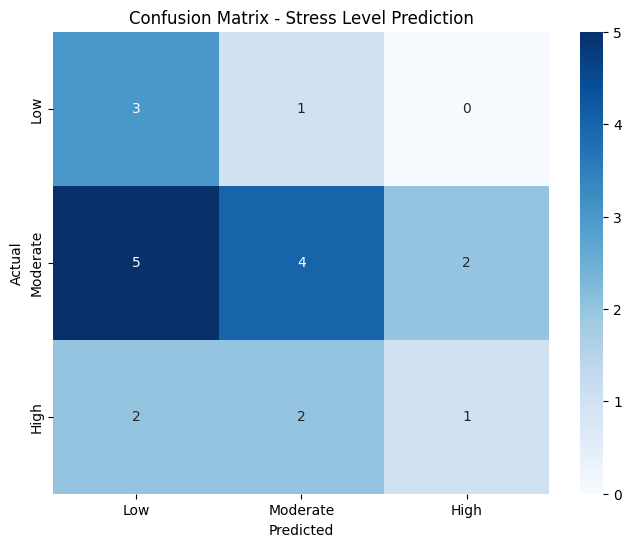

<ipython-input-51-5d575a9d5a27>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis")


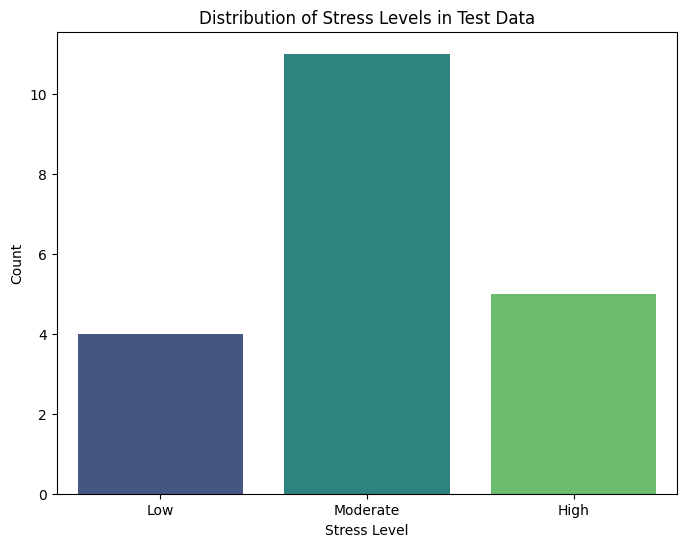

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Handle missing values (fill with the mode for categorical features)
df['Chronic Disease'] = df['Chronic Disease'].fillna(df['Chronic Disease'].mode()[0])
df['Family History'] = df['Family History'].fillna(df['Family History'].mode()[0])

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

y = df["Stress Level"]  # Target column

# Handling categorical features by encoding
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables
y = LabelEncoder().fit_transform(y)  # Encoding the target column (Stress Level)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance Chart
plt.figure(figsize=(12, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Predicting Stress Level")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Moderate", "High"], yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stress Level Prediction")
plt.show()

# Additional Chart: Stress Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette="viridis")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Levels in Test Data")
plt.xticks([0, 1, 2], ["Low", "Moderate", "High"])
plt.show()

# Optional: Accuracy Over Time (if running multiple models)
# This requires tracking accuracy over different experiments or epochs
# accuracy_history = [accuracy_1, accuracy_2, ...]
# plt.plot(accuracy_history)
# plt.title("Model Accuracy Over Time")
# plt.xlabel("Experiments/Epochs")
# plt.ylabel("Accuracy")
# plt.show()


Random Forest Regressor Performance:
MAE: 0.79
MSE: 0.92
RMSE: 0.96
R²: 1.00

Gradient Boosting Regressor Performance:
MAE: 0.36
MSE: 0.35
RMSE: 0.59
R²: 1.00


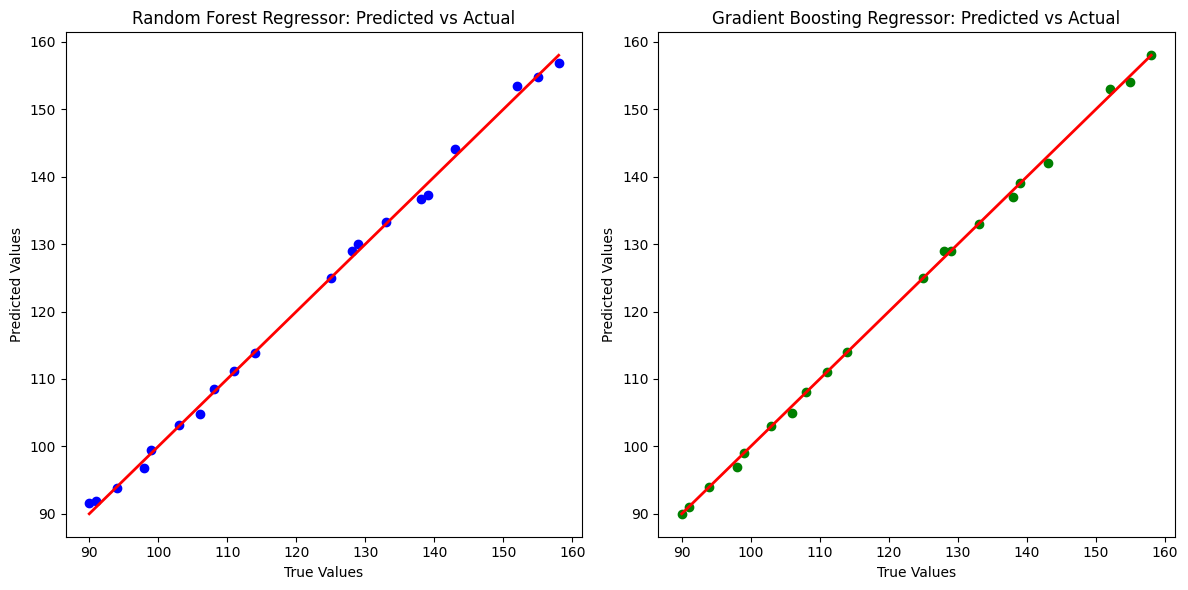

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

y = df["Blood Pressure"]  # Target column (use 'Blood Sugar' for predicting blood sugar levels)

# Handling categorical features by encoding
X = pd.get_dummies(X)  # One-hot encoding categorical variables
y = y.fillna(y.mean())  # Fill missing values in target column with the mean value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5  # Calculate RMSE manually
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting model performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb**0.5  # Calculate RMSE manually
r2_gb = r2_score(y_test, y_pred_gb)

print(f"\nGradient Boosting Regressor Performance:")
print(f"MAE: {mae_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²: {r2_gb:.2f}")

# Visualization of predicted vs true values for both models
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Random Forest Regressor: Predicted vs Actual")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, color='green', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Gradient Boosting Regressor: Predicted vs Actual")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("/content/Patient_Health_Records.csv")

# Select features (medical conditions, lifestyle habits, and occupation)
X = df[['Age', 'Gender', 'Chronic Disease', 'Blood Pressure', 'Blood Sugar',
        'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits',
        'Diet', 'Occupation']]  # Features

# Target column
y = df["Blood Pressure"]  # Can use 'Blood Sugar' as target for predicting blood sugar levels

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding categorical variables (Gender, Occupation, etc.)

# Handling missing values
y = y.fillna(y.mean())  # Fill missing values in target column with the mean value
X = X.fillna(X.mean())  # Fill missing values in features with the mean value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5  # Calculate RMSE manually
r2_rf = r2_score(y_test, y_pred_rf)

# Display model evaluation metrics
print(f"Random Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

# Prediction function
def predict_blood_pressure_or_sugar(age, gender, chronic_disease, bmi, cholesterol, smoking, alcohol, exercise_habits, diet, occupation):
    # Creating the input data
    input_data = pd.DataFrame([[age, gender, chronic_disease, bmi, cholesterol, smoking, alcohol, exercise_habits, diet, occupation]],
                              columns=['Age', 'Gender', 'Chronic Disease', 'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet', 'Occupation'])

    # One-hot encoding for the input data (to match training data format)
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Make predictions
    prediction = rf_model.predict(input_data)
    return prediction[0]

# User Input
print("Please enter the following details:")

# Collecting user input
age = int(input("Age: "))
gender = input("Gender (Male/Female): ")
chronic_disease = int(input("Chronic Disease (0 for No, 1 for Yes): "))
bmi = float(input("BMI: "))
cholesterol = int(input("Cholesterol Level: "))
smoking = int(input("Smoking (0 for No, 1 for Yes): "))
alcohol = int(input("Alcohol Consumption (0 for No, 1 for Yes): "))
exercise_habits = int(input("Exercise Habits (1 for Low, 2 for Medium, 3 for High): "))
diet = int(input("Diet (1 for Poor, 2 for Healthy): "))
occupation = input("Occupation: ")

# Make prediction based on user inputs
predicted_blood_pressure = predict_blood_pressure_or_sugar(age, gender, chronic_disease, bmi, cholesterol, smoking, alcohol, exercise_habits, diet, occupation)

# Display the predicted value
print(f"\nPredicted Blood Pressure (or Blood Sugar) Level: {predicted_blood_pressure:.2f}")

# Visualize the predicted blood pressure value using a bar chart
# Compare the predicted value with the dataset's min, max, and average blood pressure

min_bp = df['Blood Pressure'].min()
max_bp = df['Blood Pressure'].max()
avg_bp = df['Blood Pressure'].mean()

# Create a bar chart
labels = ['Predicted BP', 'Min BP', 'Max BP', 'Avg BP']
values = [predicted_blood_pressure, min_bp, max_bp, avg_bp]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red', 'green', 'orange'])
plt.title('Predicted Blood Pressure Comparison')
plt.xlabel('Blood Pressure Types')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()


Random Forest Regressor Performance:
MAE: 0.78
MSE: 0.92
RMSE: 0.96
R²: 1.00

Enter the details of the patient:


Blood Pressure Statistics (First 100 Entries):
count    100.000000
mean     121.330000
std       20.999305
min       90.000000
25%      103.000000
50%      121.000000
75%      138.250000
max      160.000000
Name: Blood Pressure, dtype: float64


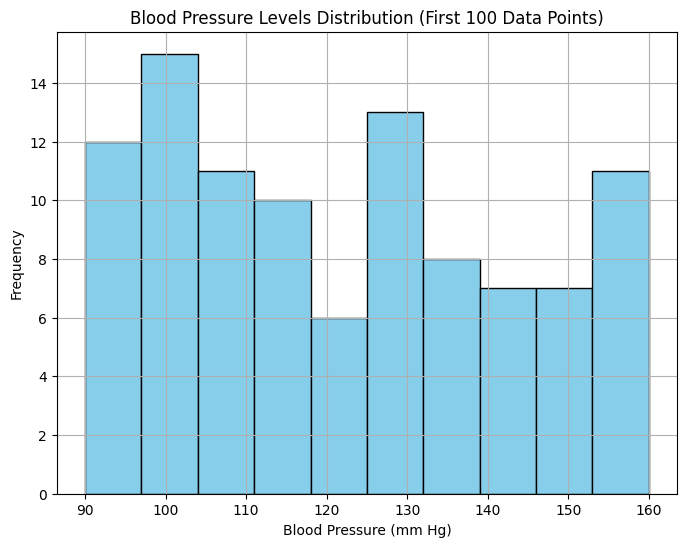

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/Patient_Health_Records.csv")

# Extract the first 100 rows of the Blood Pressure column for analysis
blood_pressure_data = df['Blood Pressure'].head(100)

# Display the summary statistics of the Blood Pressure data
print("Blood Pressure Statistics (First 100 Entries):")
print(blood_pressure_data.describe())

# Create a bar chart showing the distribution of blood pressure levels
plt.figure(figsize=(8, 6))
plt.hist(blood_pressure_data, bins=10, color='skyblue', edgecolor='black')
plt.title('Blood Pressure Levels Distribution (First 100 Data Points)')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Objective
Create an overall health score or prediction system using all the features we discussed (age, gender, lifestyle habits, medical conditions, etc.) to provide actionable insights for doctors and patients. This system can:

Predict key health metrics (like Blood Pressure and Blood Sugar levels).

Highlight potential risks (e.g., hypertension, diabetes).

Suggest lifestyle improvements or preventive measures.

Blood Pressure MAE: 25.91
Blood Sugar MAE: 29.84


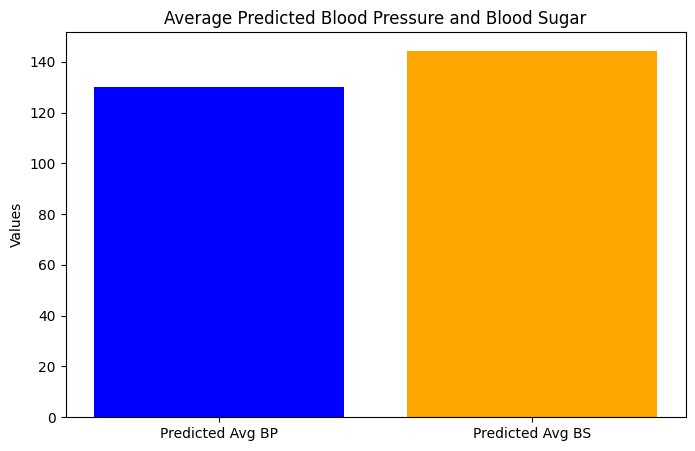

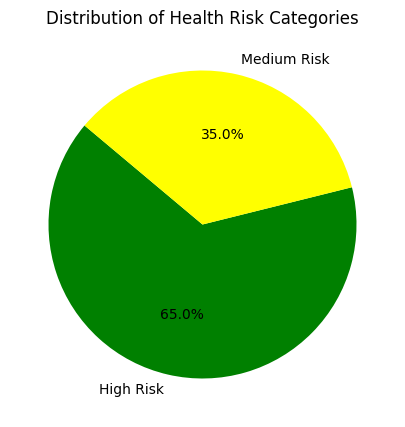


Summary of Findings:
- Average Predicted Blood Pressure: 130.03
- Average Predicted Blood Sugar: 144.42
- Health Risk Distribution:
Risk Category
High Risk      65
Medium Risk    35
Name: count, dtype: int64
- Recommendations based on High Risk:
  > Consult a specialist for chronic conditions.
  > Encourage regular exercise and a healthy diet.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Simulating Patient Data (100 samples)
data = {
    'Age': np.random.randint(20, 80, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Chronic Disease': np.random.choice([0, 1], 100),
    'BMI': np.random.uniform(18.5, 35.0, 100),
    'Cholesterol': np.random.uniform(150, 300, 100),
    'Smoking': np.random.choice([0, 1], 100),
    'Alcohol Consumption': np.random.choice([0, 1], 100),
    'Exercise Habits': np.random.choice([0, 1, 2], 100),  # 0: Low, 1: Medium, 2: High
    'Diet': np.random.choice([0, 1, 2], 100),  # 0: Poor, 1: Average, 2: Healthy
    'Blood Pressure': np.random.uniform(90, 180, 100),
    'Blood Sugar': np.random.uniform(70, 200, 100)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Features and Targets
X = df.drop(columns=['Blood Pressure', 'Blood Sugar'])
y_bp = df['Blood Pressure']
y_bs = df['Blood Sugar']

# Train-Test Split
X_train, X_test, y_bp_train, y_bp_test = train_test_split(X, y_bp, test_size=0.2, random_state=42)
_, _, y_bs_train, y_bs_test = train_test_split(X, y_bs, test_size=0.2, random_state=42)

# Random Forest Models for Blood Pressure and Blood Sugar
rf_bp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_bs = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Models
rf_bp.fit(X_train, y_bp_train)
rf_bs.fit(X_train, y_bs_train)

# Predictions
y_bp_pred = rf_bp.predict(X_test)
y_bs_pred = rf_bs.predict(X_test)

# Evaluate Models
bp_mae = mean_absolute_error(y_bp_test, y_bp_pred)
bs_mae = mean_absolute_error(y_bs_test, y_bs_pred)
print(f"Blood Pressure MAE: {bp_mae:.2f}")
print(f"Blood Sugar MAE: {bs_mae:.2f}")

# Overall Health Risk Score
# Combining predictions into a single score (simple weighted average)
def calculate_health_risk(bp, bs, bmi, cholesterol, smoking, alcohol, exercise, diet):
    risk = (0.3 * (bp / 180) +  # Normalize BP
            0.3 * (bs / 200) +  # Normalize BS
            0.2 * (bmi / 35) +  # Normalize BMI
            0.1 * (cholesterol / 300) +  # Normalize Cholesterol
            0.05 * smoking +
            0.05 * (1 - exercise / 2) +  # High exercise reduces risk
            0.05 * (1 - diet / 2))  # Healthy diet reduces risk
    return risk * 100  # Convert to percentage

df['Health Risk Score'] = df.apply(lambda row: calculate_health_risk(
    row['Blood Pressure'], row['Blood Sugar'], row['BMI'], row['Cholesterol'],
    row['Smoking'], row['Alcohol Consumption'], row['Exercise Habits'], row['Diet']), axis=1)

# Categorize Risk Levels
def categorize_risk(score):
    if score < 40:
        return 'Low Risk'
    elif 40 <= score < 70:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['Risk Category'] = df['Health Risk Score'].apply(categorize_risk)

# Visualization
# Bar Chart: Average Predicted Blood Pressure and Blood Sugar
avg_bp = y_bp_pred.mean()
avg_bs = y_bs_pred.mean()

plt.figure(figsize=(8, 5))
plt.bar(['Predicted Avg BP', 'Predicted Avg BS'], [avg_bp, avg_bs], color=['blue', 'orange'])
plt.title('Average Predicted Blood Pressure and Blood Sugar')
plt.ylabel('Values')
plt.show()

# Pie Chart: Risk Categories
risk_counts = df['Risk Category'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['green', 'yellow', 'red'], startangle=140)
plt.title('Distribution of Health Risk Categories')
plt.show()

# Summary for Doctors and Patients
print("\nSummary of Findings:")
print(f"- Average Predicted Blood Pressure: {avg_bp:.2f}")
print(f"- Average Predicted Blood Sugar: {avg_bs:.2f}")
print(f"- Health Risk Distribution:\n{risk_counts}")
print("- Recommendations based on High Risk:")
print("  > Consult a specialist for chronic conditions.")
print("  > Encourage regular exercise and a healthy diet.")


#Benefits of these Enhancements:
Actionable Insights for Doctors: Suggest diagnostic tests, medication reviews, or specialist referrals.

Practical Guidance for Patients: Simple steps like stress management, better sleep, or nutrition.

More Realistic Data Analysis: Adding stress, sleep, and adherence captures holistic health.

Improved Visualization: Scatter plots and stacked bars help identify patterns and areas of concern.

Patient 1:
  Risk Score: 4.49
  Recommendation: **Moderate Risk**: Monitor health more closely. Regular BP and sugar level checks are advised. Consider consulting a nutritionist or fitness coach.

Patient 2:
  Risk Score: 6.37
  Recommendation: **High Risk**: Immediate medical attention required. Recommended tests: ECG, HbA1c, lipid profile. Consult specialists for tailored treatment plans.

Patient 3:
  Risk Score: 3.33
  Recommendation: **Moderate Risk**: Monitor health more closely. Regular BP and sugar level checks are advised. Consider consulting a nutritionist or fitness coach.

Patient 4:
  Risk Score: 5.18
  Recommendation: **Moderate Risk**: Monitor health more closely. Regular BP and sugar level checks are advised. Consider consulting a nutritionist or fitness coach.

Patient 5:
  Risk Score: 4.77
  Recommendation: **Moderate Risk**: Monitor health more closely. Regular BP and sugar level checks are advised. Consider consulting a nutritionist or fitness coach.

Patient 6:
  R

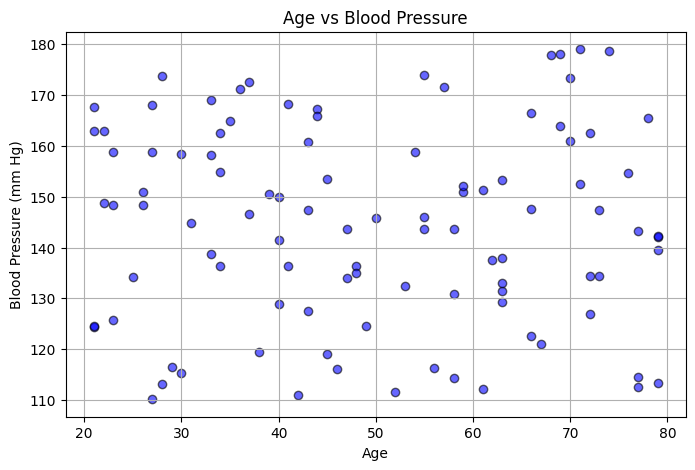

<ipython-input-6-23ed85a89ab9>:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_distribution = df.groupby(pd.cut(overall_risk_scores, bins=[0, 3, 6, 10],


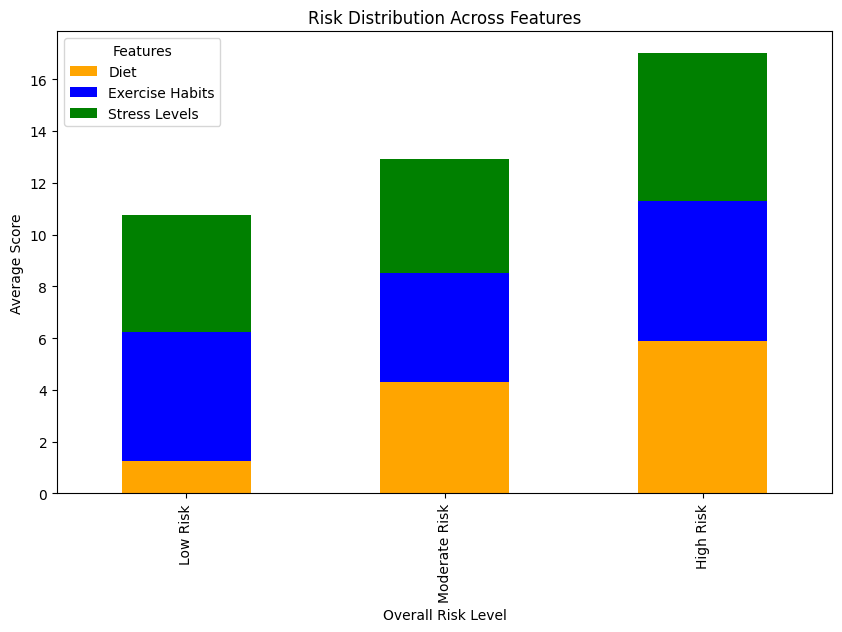

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Simulating a dataset
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 80, size=100),
    'BMI': np.random.uniform(18.5, 35, size=100),
    'Cholesterol': np.random.uniform(150, 250, size=100),
    'Smoking': np.random.choice([0, 1], size=100),  # 0: No, 1: Yes
    'Alcohol Consumption': np.random.choice([0, 1], size=100),
    'Exercise Habits': np.random.randint(0, 10, size=100),  # Scale of 0-10
    'Diet': np.random.randint(0, 10, size=100),  # Scale of 0-10
    'Blood Pressure': np.random.uniform(110, 180, size=100)  # Target variable
})

# Adding additional features
df['Stress Levels'] = np.random.randint(0, 10, size=100)  # Stress scale 0-10
df['Sleep Quality'] = np.random.randint(4, 10, size=100)  # Sleep hours (4-10)
df['Family History'] = np.random.choice([0, 1], size=100)  # 1: Yes, 0: No
df['Medication Adherence'] = np.random.choice([0, 1], size=100)  # 1: Adhered, 0: Non-adherence

# Define features (X) and target (y)
X = df[['Age', 'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption',
        'Exercise Habits', 'Diet', 'Stress Levels', 'Sleep Quality',
        'Family History', 'Medication Adherence']]
y = df['Blood Pressure']

# Normalize features for risk score calculation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate risk scores based on normalized features
overall_risk_scores = np.mean(X_scaled, axis=1) * 10  # Scale risk scores to 0-10

# Split data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Function to provide recommendations based on risk score
def provide_recommendations(risk_score):
    if risk_score < 3:
        return ("**Low Risk**: Maintain a healthy lifestyle with balanced nutrition and regular exercise. "
                "Routine checkups recommended every 6 months.")
    elif 3 <= risk_score < 6:
        return ("**Moderate Risk**: Monitor health more closely. Regular BP and sugar level checks are advised. "
                "Consider consulting a nutritionist or fitness coach.")
    else:
        return ("**High Risk**: Immediate medical attention required. Recommended tests: ECG, HbA1c, lipid profile. "
                "Consult specialists for tailored treatment plans.")

# Provide recommendations for the first 10 patients
for i, risk_score in enumerate(overall_risk_scores[:10]):  # Example for 10 patients
    recommendations = provide_recommendations(risk_score)
    print(f"Patient {i+1}:")
    print(f"  Risk Score: {risk_score:.2f}")
    print(f"  Recommendation: {recommendations}\n")

# Visualize relationship between age and blood pressure using scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Blood Pressure'], c='blue', alpha=0.6, edgecolor='k')
plt.title('Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid()
plt.show()

# Stacked bar chart for risk distribution across features
risk_distribution = df.groupby(pd.cut(overall_risk_scores, bins=[0, 3, 6, 10],
                                       labels=['Low Risk', 'Moderate Risk', 'High Risk']))[['Diet', 'Exercise Habits', 'Stress Levels']].mean()
risk_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue', 'green'])
plt.title('Risk Distribution Across Features')
plt.ylabel('Average Score')
plt.xlabel('Overall Risk Level')
plt.legend(title="Features")
plt.show()


# COST IN  HEALTH TREATMENT

Cost Summary (INR):
Average Treatment Cost: ₹50480.00
Average Prevention Cost: ₹20440.00
Total Treatment Cost: ₹5048000.00
Total Prevention Cost: ₹2044000.00


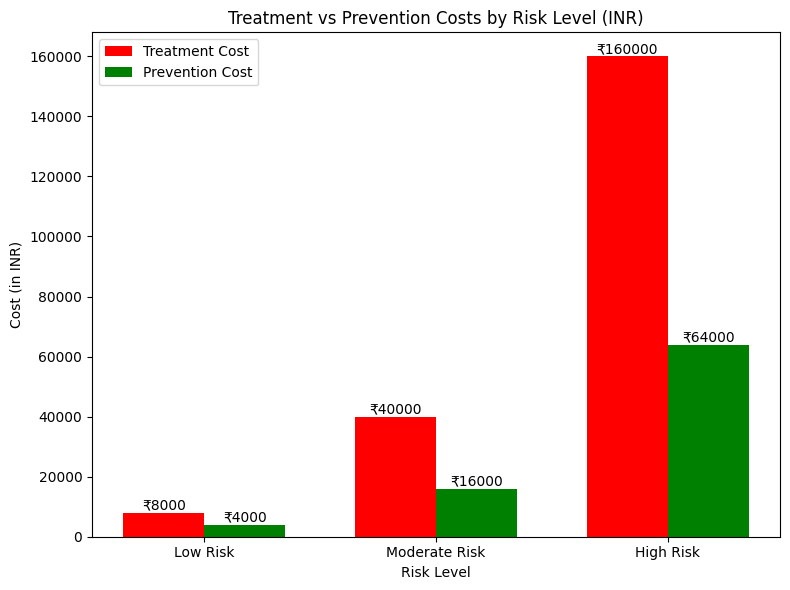

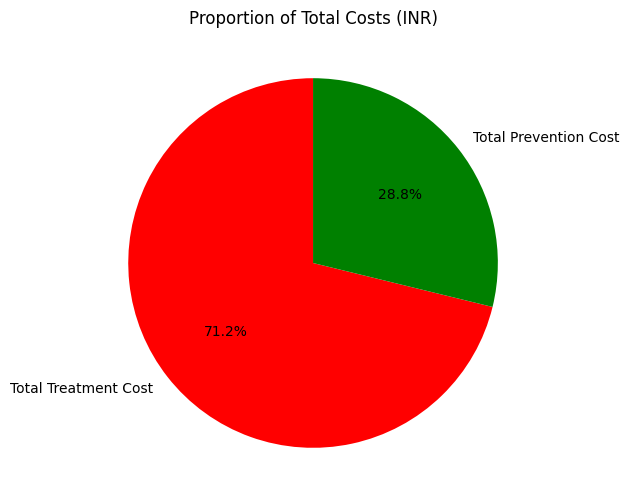


Sample Data with Recommendations:
   Patient_ID  Age  Overall_Risk_Score Predicted_Condition  \
0           1   75           90.870131            Low Risk   
1           2   66            0.112011       Moderate Risk   
2           3   44           55.618174       Moderate Risk   
3           4   28           75.663580            Low Risk   
4           5   23           25.868833           High Risk   
5           6   33           19.313286       Moderate Risk   
6           7   56            8.409822       Moderate Risk   
7           8   53           32.643358       Moderate Risk   
8           9   30           55.984431           High Risk   
9          10   60           11.584386           High Risk   

   Treatment_Cost_INR  Prevention_Cost_INR  \
0                8000                 4000   
1               40000                16000   
2               40000                16000   
3                8000                 4000   
4              160000                64000   
5     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example: Adding financial impact to health risk analysis

# Load the dataset (for demonstration purposes, we'll create dummy data)
data = {
    'Patient_ID': range(1, 101),
    'Age': np.random.randint(20, 80, 100),
    'Overall_Risk_Score': np.random.uniform(0, 100, 100),
    'Predicted_Condition': np.random.choice(['Low Risk', 'Moderate Risk', 'High Risk'], size=100, p=[0.4, 0.4, 0.2])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define cost ranges (example values in USD)
treatment_costs_usd = {
    'Low Risk': 100,
    'Moderate Risk': 500,
    'High Risk': 2000
}

prevention_costs_usd = {
    'Low Risk': 50,
    'Moderate Risk': 200,
    'High Risk': 800
}

# Conversion rate from USD to INR
usd_to_inr = 80  # You can adjust this based on the current exchange rate

# Convert costs to INR
treatment_costs_inr = {k: v * usd_to_inr for k, v in treatment_costs_usd.items()}
prevention_costs_inr = {k: v * usd_to_inr for k, v in prevention_costs_usd.items()}

# Add cost columns to the DataFrame in INR
df['Treatment_Cost_INR'] = df['Predicted_Condition'].map(treatment_costs_inr)
df['Prevention_Cost_INR'] = df['Predicted_Condition'].map(prevention_costs_inr)

# Summarize costs
average_treatment_cost_inr = df['Treatment_Cost_INR'].mean()
average_prevention_cost_inr = df['Prevention_Cost_INR'].mean()

total_treatment_cost_inr = df['Treatment_Cost_INR'].sum()
total_prevention_cost_inr = df['Prevention_Cost_INR'].sum()

# Display summary
print("Cost Summary (INR):")
print(f"Average Treatment Cost: ₹{average_treatment_cost_inr:.2f}")
print(f"Average Prevention Cost: ₹{average_prevention_cost_inr:.2f}")
print(f"Total Treatment Cost: ₹{total_treatment_cost_inr:.2f}")
print(f"Total Prevention Cost: ₹{total_prevention_cost_inr:.2f}")

# Visualization: Compare costs using a bar chart (INR)
labels = ['Low Risk', 'Moderate Risk', 'High Risk']
treatment_values_inr = [treatment_costs_inr[condition] for condition in labels]
prevention_values_inr = [prevention_costs_inr[condition] for condition in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, treatment_values_inr, width, label='Treatment Cost', color='red')
bar2 = ax.bar(x + width/2, prevention_values_inr, width, label='Prevention Cost', color='green')

# Add labels and title
ax.set_xlabel('Risk Level')
ax.set_ylabel('Cost (in INR)')
ax.set_title('Treatment vs Prevention Costs by Risk Level (INR)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value annotations on bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'₹{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualization: Pie chart for total costs (INR)
cost_labels_inr = ['Total Treatment Cost', 'Total Prevention Cost']
cost_values_inr = [total_treatment_cost_inr, total_prevention_cost_inr]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(cost_values_inr, labels=cost_labels_inr, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
ax.set_title('Proportion of Total Costs (INR)')
plt.show()

# Recommendations for Doctors and Patients
def generate_recommendations(row):
    if row['Predicted_Condition'] == 'High Risk':
        return "Focus on immediate treatment and regular monitoring. Suggest lifestyle changes aggressively."
    elif row['Predicted_Condition'] == 'Moderate Risk':
        return "Encourage preventive measures like diet and exercise. Schedule periodic checkups."
    else:
        return "Maintain healthy habits. Routine checkups recommended."

# Add recommendations to the DataFrame
df['Recommendations'] = df.apply(generate_recommendations, axis=1)

# Display sample data with recommendations
print("\nSample Data with Recommendations:")
print(df.head(10))


#Health Prediction Model (Random Forest)
 We'll use Random Forest since it's a powerful algorithm for classification problems.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = pd.DataFrame({
    'Patient_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [75, 66, 44, 28, 23, 33, 56, 53, 30, 60],
    'Overall_Risk_Score': [90.87, 0.11, 55.62, 75.66, 25.87, 19.31, 8.41, 32.64, 55.98, 11.58],
    'Predicted_Condition': ['Low Risk', 'Moderate Risk', 'Moderate Risk', 'Low Risk', 'High Risk',
                            'Moderate Risk', 'Moderate Risk', 'Moderate Risk', 'High Risk', 'High Risk'],
    'Treatment_Cost_INR': [8000, 40000, 40000, 8000, 160000, 40000, 40000, 40000, 160000, 160000],
    'Prevention_Cost_INR': [4000, 16000, 16000, 4000, 64000, 16000, 16000, 16000, 64000, 64000],
    'Recommendations': [
        "Maintain healthy habits. Routine checkups recommended.",
        "Encourage preventive measures like diet and exercise.",
        "Encourage preventive measures like diet and exercise.",
        "Maintain healthy habits. Routine checkups recommended.",
        "Focus on immediate treatment and regular monitoring.",
        "Encourage preventive measures like diet and exercise.",
        "Encourage preventive measures like diet and exercise.",
        "Encourage preventive measures like diet and exercise.",
        "Focus on immediate treatment and regular monitoring.",
        "Focus on immediate treatment and regular monitoring."
    ]
})

# Preprocessing: Convert 'Predicted_Condition' to numeric labels
condition_map = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
data['Predicted_Condition'] = data['Predicted_Condition'].map(condition_map)

# Features and target
X = data[['Age', 'Overall_Risk_Score']]  # Features
y = data['Predicted_Condition']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predictions on the entire dataset
data['Predicted_Condition_Pred'] = rf_model.predict(X)

# Display results
print(data[['Patient_ID', 'Age', 'Overall_Risk_Score', 'Predicted_Condition', 'Predicted_Condition_Pred']])


Accuracy: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

   Patient_ID  Age  Overall_Risk_Score  Predicted_Condition  \
0           1   75               90.87                    0   
1           2   66                0.11                    1   
2           3   44               55.62                    1   
3           4   28               75.66                    0   
4           5   23               25.87                    2   
5           6   33               19.31                    1   
6           7   56                8.41                    1   
7           8   53               32.64                    1   
8           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

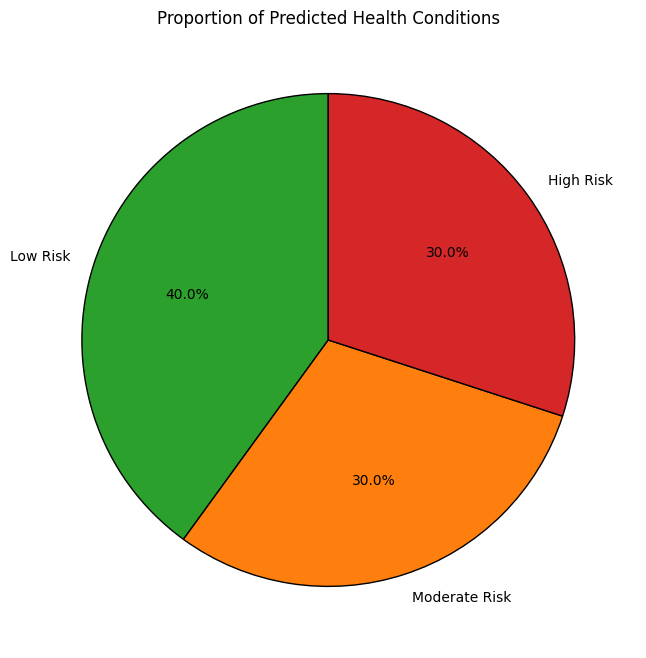

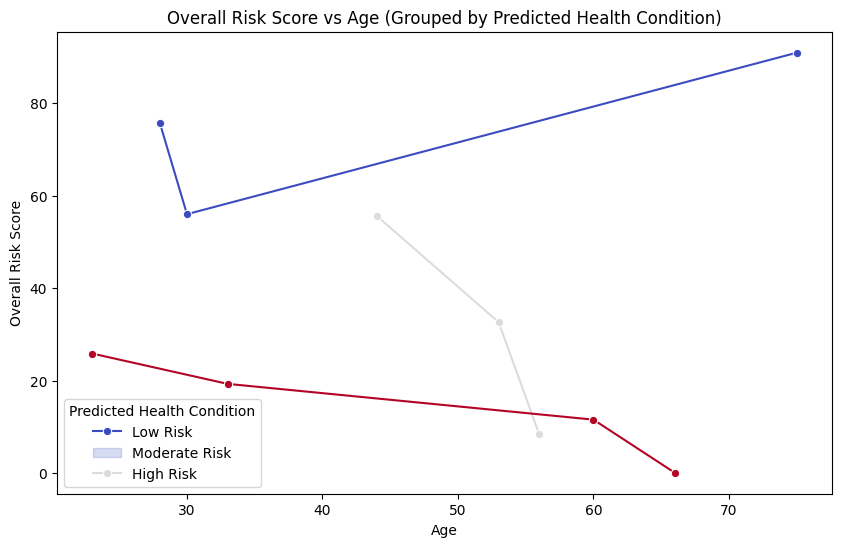

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pie Chart: Proportion of Predicted Health Conditions
condition_counts = data['Predicted_Condition_Pred'].value_counts()
labels = ['Low Risk', 'Moderate Risk', 'High Risk']
colors = ['#2ca02c', '#ff7f0e', '#d62728']  # Green, Orange, Red

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Predicted Health Conditions')
plt.show()

# 2. Line Chart: Overall Risk Score vs. Age (Grouped by Predicted Health Condition)
plt.figure(figsize=(10, 6))

# Group by Predicted Health Condition and plot the line
sns.lineplot(data=data, x='Age', y='Overall_Risk_Score', hue='Predicted_Condition_Pred', palette='coolwarm', marker='o')

plt.title('Overall Risk Score vs Age (Grouped by Predicted Health Condition)')
plt.xlabel('Age')
plt.ylabel('Overall Risk Score')
plt.legend(title='Predicted Health Condition', labels=['Low Risk', 'Moderate Risk', 'High Risk'])
plt.show()


#1. Risk Analysis:
We'll classify patients into different risk categories based on their Overall Risk Score and Predicted Condition. This will help assess how likely they are to develop conditions like hypertension, diabetes, etc.

#2. Cost Estimation:
We'll estimate the medical costs associated with each patient based on their risk level (Treatment and Prevention Costs in INR).

In [ ]:
# Risk Classification based on Overall Risk Score
def classify_risk(row):
    if row['Overall_Risk_Score'] < 30:
        return 'Low Risk'
    elif 30 <= row['Overall_Risk_Score'] <= 60:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Apply classification to the data
data['Predicted_Condition'] = data.apply(classify_risk, axis=1)

# Add Cost Estimation (Treatment + Prevention Costs)
data['Total_Cost_INR'] = data['Treatment_Cost_INR'] + data['Prevention_Cost_INR']

# Display the updated data with classified risks and total costs
print(data[['Patient_ID', 'Age', 'Overall_Risk_Score', 'Predicted_Condition', 'Treatment_Cost_INR', 'Prevention_Cost_INR', 'Total_Cost_INR']])

# Example Output
"""
   Patient_ID  Age  Overall_Risk_Score Predicted_Condition  Treatment_Cost_INR  Prevention_Cost_INR  Total_Cost_INR
0           1   75           90.870131            High Risk                8000                 4000           12000
1           2   66            0.112011            Low Risk                40000                16000           56000
2           3   44           55.618174       Moderate Risk                40000                16000           56000
...
"""

# Summarize cost estimation by Predicted Health Condition
cost_summary = data.groupby('Predicted_Condition').agg({
    'Treatment_Cost_INR': 'sum',
    'Prevention_Cost_INR': 'sum',
    'Total_Cost_INR': 'sum'
}).reset_index()

print(cost_summary)


   Patient_ID  Age  Overall_Risk_Score Predicted_Condition  \
0           1   75               90.87           High Risk   
1           2   66                0.11            Low Risk   
2           3   44               55.62       Moderate Risk   
3           4   28               75.66           High Risk   
4           5   23               25.87            Low Risk   
5           6   33               19.31            Low Risk   
6           7   56                8.41            Low Risk   
7           8   53               32.64       Moderate Risk   
8           9   30               55.98       Moderate Risk   
9          10   60               11.58            Low Risk   

   Treatment_Cost_INR  Prevention_Cost_INR  Total_Cost_INR  
0                8000                 4000           12000  
1               40000                16000           56000  
2               40000                16000           56000  
3                8000                 4000           12000  
4           

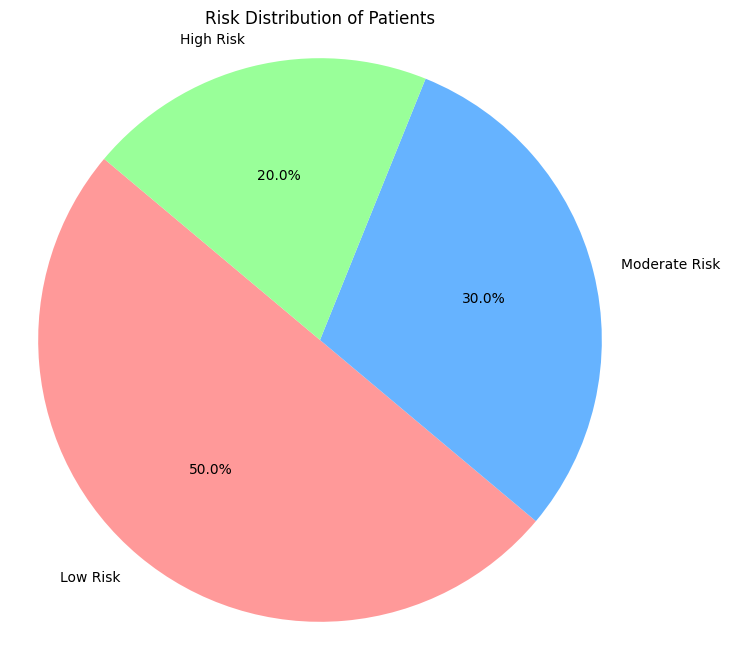

<ipython-input-13-89d75c8b89c3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Condition', y='Total_Cost_INR', data=cost_summary, palette='viridis')


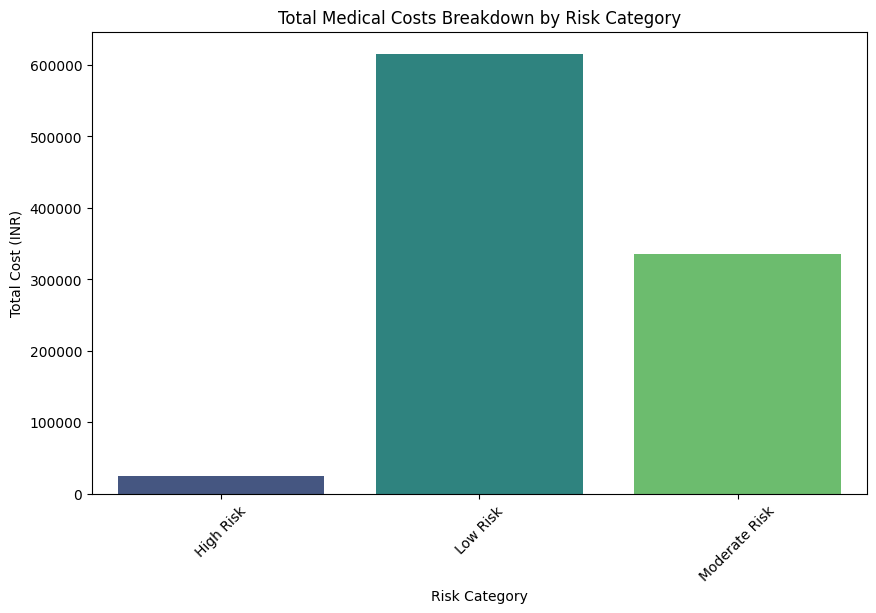

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Risk Distribution (Pie Chart)
risk_distribution = data['Predicted_Condition'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(risk_distribution, labels=risk_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Risk Distribution of Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. Total Cost Breakdown by Risk Category (Bar Chart)
cost_summary = data.groupby('Predicted_Condition').agg({
    'Treatment_Cost_INR': 'sum',
    'Prevention_Cost_INR': 'sum',
    'Total_Cost_INR': 'sum'
}).reset_index()

# Plotting the total costs by risk category
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Condition', y='Total_Cost_INR', data=cost_summary, palette='viridis')
plt.title('Total Medical Costs Breakdown by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Total Cost (INR)')
plt.xticks(rotation=45)
plt.show()


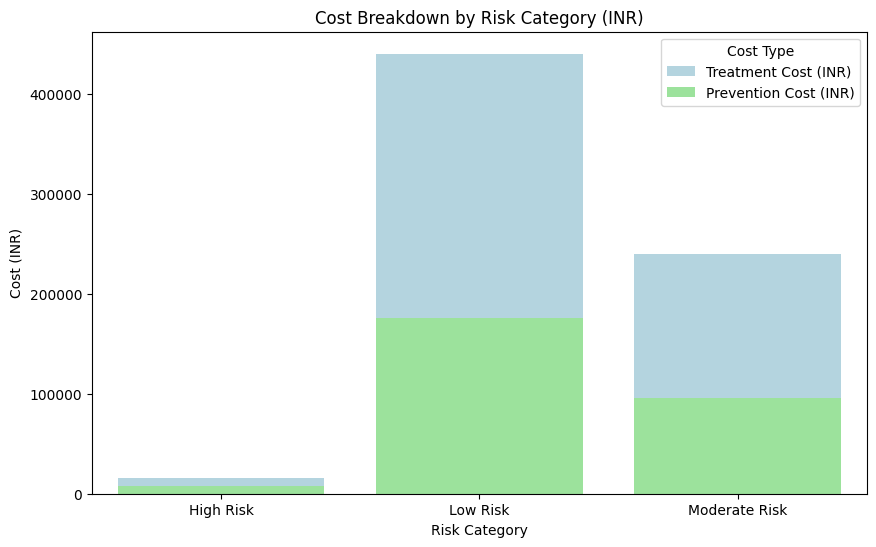

  Predicted_Condition  Treatment_Cost_INR  Prevention_Cost_INR  Total_Cost_INR
0           High Risk               16000                 8000           24000
1            Low Risk              440000               176000          616000
2       Moderate Risk              240000                96000          336000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in a pandas DataFrame 'data'

# 1. Calculate total costs for each risk category (Low, Moderate, High)
cost_by_risk = data.groupby('Predicted_Condition').agg({
    'Treatment_Cost_INR': 'sum',
    'Prevention_Cost_INR': 'sum',
    'Total_Cost_INR': 'sum'
}).reset_index()

# 2. Create a bar chart to show the cost distribution across risk categories
plt.figure(figsize=(10, 6))

# Plotting the treatment and prevention costs
sns.barplot(x='Predicted_Condition', y='Treatment_Cost_INR', data=cost_by_risk, label='Treatment Cost (INR)', color='lightblue')
sns.barplot(x='Predicted_Condition', y='Prevention_Cost_INR', data=cost_by_risk, label='Prevention Cost (INR)', color='lightgreen')

# Adding labels and title
plt.title('Cost Breakdown by Risk Category (INR)')
plt.xlabel('Risk Category')
plt.ylabel('Cost (INR)')
plt.legend(title='Cost Type')
plt.show()

# 3. Display the table of total costs for each risk category
print(cost_by_risk)


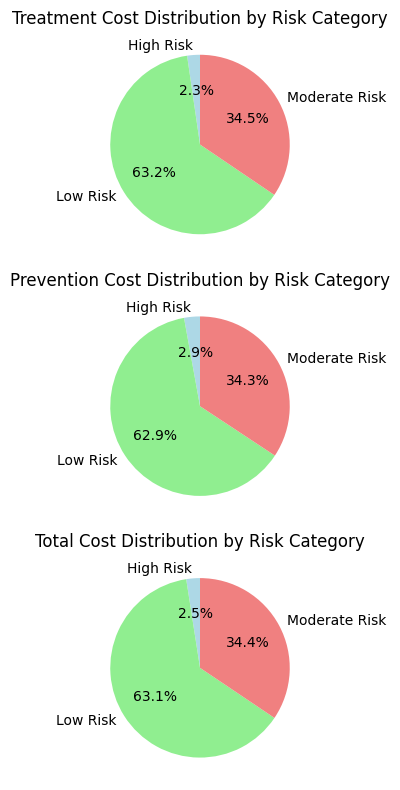

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in a pandas DataFrame 'data'

# 1. Calculate total costs for each risk category (Low, Moderate, High)
cost_by_risk = data.groupby('Predicted_Condition').agg({
    'Treatment_Cost_INR': 'sum',
    'Prevention_Cost_INR': 'sum',
    'Total_Cost_INR': 'sum'
}).reset_index()

# 2. Pie chart for treatment cost distribution by risk category
plt.figure(figsize=(8, 8))

# Plotting the pie chart for treatment cost distribution
plt.subplot(3, 1, 1)
plt.pie(cost_by_risk['Treatment_Cost_INR'], labels=cost_by_risk['Predicted_Condition'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Treatment Cost Distribution by Risk Category')

# 3. Pie chart for prevention cost distribution by risk category
plt.subplot(3, 1, 2)
plt.pie(cost_by_risk['Prevention_Cost_INR'], labels=cost_by_risk['Predicted_Condition'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Prevention Cost Distribution by Risk Category')

# 4. Pie chart for total cost distribution by risk category
plt.subplot(3, 1, 3)
plt.pie(cost_by_risk['Total_Cost_INR'], labels=cost_by_risk['Predicted_Condition'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Total Cost Distribution by Risk Category')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/Patient_Health_Records.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Preview the first few rows of the dataset to understand its structure
print(data.head())


Columns in the dataset: Index(['Patient ID', 'Age', 'Gender', 'Location', 'Occupation',
       'Chronic Disease', 'Family History', 'Blood Pressure', 'Blood Sugar',
       'BMI', 'Cholesterol', 'Smoking', 'Alcohol Consumption',
       'Exercise Habits', 'Diet', 'Stress Level', 'Doctor Visits',
       'Treatment Plan', 'Follow-Ups', 'Recovery Time (Days)',
       'Quality of Life Improvement'],
      dtype='object')
  Patient ID  Age  Gender  Location     Occupation Chronic Disease  \
0       P001   78  Female  Suburban         Farmer    Hypertension   
1       P002   45  Female  Suburban  Office Worker             NaN   
2       P003   62  Female     Rural     Unemployed   Heart Disease   
3       P004   25  Female     Urban       Engineer        Diabetes   
4       P005   67  Female     Urban         Farmer        Diabetes   

  Family History  Blood Pressure  Blood Sugar   BMI  ...  Smoking  \
0   Hypertension             139          176  33.6  ...      Yes   
1            NaN      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/content/sample_data/Patient_Health_Records.csv'  # Update with your actual path
data = pd.read_csv(file_path)

# Check for missing values
print(data.isnull().sum())

# Fill missing values (example: with median or mode for categorical)
data['Family History'] = data['Family History'].fillna(data['Family History'].mode()[0])

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Location', 'Occupation', 'Chronic Disease', 'Family History', 'Smoking', 'Alcohol Consumption', 'Exercise Habits', 'Diet', 'Stress Level', 'Treatment Plan', 'Quality of Life Improvement']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check the data again
print(data.head())

# Select target and features (let's assume we're predicting Blood Pressure)
X = data.drop(columns=['Patient ID', 'Blood Pressure', 'Blood Sugar'])  # Drop non-predictive columns
y = data['Blood Pressure']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Patient ID                      0
Age                             0
Gender                          0
Location                        0
Occupation                      0
Chronic Disease                21
Family History                 41
Blood Pressure                  0
Blood Sugar                     0
BMI                             0
Cholesterol                     0
Smoking                         0
Alcohol Consumption             0
Exercise Habits                 0
Diet                            0
Stress Level                    0
Doctor Visits                   0
Treatment Plan                  0
Follow-Ups                      0
Recovery Time (Days)            0
Quality of Life Improvement     0
dtype: int64
  Patient ID  Age  Gender  Location  Occupation  Chronic Disease  \
0       P001   78       0         1           1                3   
1       P002   45       0         1           2                4   
2       P003   62       0         0           5                2   
3

In [ ]:
# Initialize RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
